# TP Physique - Équation de la chaleur
## Exercice 2

Eq en régime permanent

$\frac{d^2T}{dx^2} = 0$

$T(x = 0) = T0$

$T(x = 1) = T1$

$ T(i)_{i} \in [0, N+1]$

$x(i+1) - x(i) = \Delta X = \frac{1}{N}$

$\frac{d2T}{dx2} = \frac{T(i-1) - 2*T(i) + T(i+1)}{\Delta x^2}$

### Question 1: Résoudre cette équation pour les conditions aux bord
$$
\frac{d2T}{dx2} => \frac{dT}{dx} = A => T(x) = Ax + b
$$

Ici $b = T0$ d'où $T(x) = Ax + T0$

$$
\frac{T1 - T0}{1 - 0} = A = T1 - T0 donc T(x) = (T1 - T0)x + T0
$$
### Question 2: Ecrire l'équation de la chaleur discrétisée pour $i \in [1, N-2]$, puis pour $i = 0$ et $i = N$
$$\frac{d2T}{dx2} = 0$$

$$T(i+1) - 2*T(i) + T(i-1) = 0$$

Pour $i = 0$: $T(i-1) = ? => CB = T0-$

$$
-2T0 + T(1) = -T0-
$$

Pour $i = N$: $T(N+2) = T1+$

$$
T(N) - 2T(N+1) = -T1+
$$

Système linéaire
$$
\begin{cases}
-2T_0 + T_1 = -T_0 \\
T_0 - 2T_1 + T_2 = 0 \\
T_1 - 2T_2 + T_3 = 0 \\
\vdots \\
T_{N-1} - 2T_N + T_{N+1} = 0 \\
T_N - 2T_{N+1} = -T_1
\end{cases}
$$

### Question 3: Montrer que l'équation discrétisée peut s'écrire: $MT = b$, avc $M$ une matrice de taille $N * N$ et $b$ un vecteur de taille $N$. On précisera les termes non nuls de $M$ et $b$.
Matrice du système (simplifiée pour $N = 6$, normalement $N$ indéfini)
$$
\begin{bmatrix}
-2 & 1 & 0 & 0 & 0 & 0 & 0\\
1 & -2 & 1 & 0 & 0 & 0 & 0\\
0 & 1 & -2 & 1 & 0 & 0 & 0\\
0 & 0 & 1 & -2 & 1 & 0 & 0\\
0 & 0 & 0 & 1 & -2 & 1 & 0\\
0 & 0 & 0 & 0 & 1 & -2 & 1\\
0 & 0 & 0 & 0 & 0 & 1 & -2\\
\end{bmatrix}
\begin{bmatrix}
T0\\
T1\\
T2\\
T3\\
T4\\
T5\\
T
\end{bmatrix}
=
\begin{bmatrix}
-T0\\
0\\
0\\
0\\
0\\
0\\
-T1+
\end{bmatrix}
$$

### Question 4: Sous python, construire la matrice $M$ et le vecteur $b$ à l'aide de numpy. Résoudre ensuite le système linéaire à l'aide de la fonction numpy.linalg.solve(M, b).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes et paramètres
N = 100

M = np.zeros((N + 1, N + 1))

b = np.zeros(N + 1)

# Conditions aux bords
T0 = -4
T1 = 25

# Remplissage de la matrice M
for i in range(N + 1):
    if i == 0:
        M[i, i] = -2
        M[i, i + 1] = 1
    elif i == N:
        M[i, i - 1] = 1
        M[i, i] = -2
    else:
        M[i, i - 1] = 1
        M[i, i] = -2
        M[i, i + 1] = 1

# Affichage de la matrice M
print(f"Matrice M: {M}")

# Remplissage du vecteur b
b[0] = -T0
b[N] = -T1

# Affichage du vecteur b
print(f"Matrice b: {b}")

# Résolution du système linéaire
T = np.linalg.solve(M, b)

# Affichage de la solution
print(f"Solution T: {T}")

# Tracé de la solution
plt.plot(T, label="Température")
plt.xlabel("Temps (minutes)")
plt.ylabel("Température (°C)")
plt.title("Distribution de température")
plt.grid()
plt.show()

## Exercice 3
$$
\frac{dT}{dt} = D \frac{d^2T}{dx^2}
$$
Le coefficient de diffusion $D$ sera pris égal à 1.
### Question 1: Rappeler l'itération d'Euler pour la dérivée première et pour un pas de temps $dt$.
On se place au temps $n$ pour un certain $i$:
$$
\frac{T^{n+1}_{i} - T^n_{i}}{\Delta t} = D \frac{T^{n}_{i-1} - 2T^n_{i} + T^{n}_{i+1}}{\Delta x^2}
$$
### Question 2: Donner l'expression de $T^{n+1}_{i} pour i \in [1, N]$.
$$
(T^{n+1}_{i})_{i \in [1, N]} = \Delta t
$$
Conditions au bord:
$$
T(x = 0) = T(x = 1) = 0
$$
### Question 3: Comment adapter cette expression lorsque $i = 0$ et $i = N$?
$$
\begin{cases}
i = 0 (condition \space de \space gauche) \\
i = N (condition \space de \space droite)
\end{cases}
$$

$$
T^{n+1}_{i} = T^n_{i} + \frac{\Delta t D}{\Delta x^2} (T^{n}_{i-1} - 2T^n_{i} + T^{n}_{i+1}) = \frac{\Delta t D}{\Delta x^2} T^{n}_{i-1} + (1 - 2\frac{\Delta t D}{\Delta x^2}) T^n_{i} + \frac{\Delta t D}{\Delta x^2} T^{n}_{i+1}
$$

$$
\forall n T-1 = T_{n + 1} = 0
$$

$$
i = 0 => T^{n+1}_{0} = (1 - 2\frac{\Delta t D}{\Delta x^2}) T^n_{0} + \frac{\Delta t D}{\Delta x^2} T^{n}_{1}
$$

$$
i = N => T^{n+1}_{N} = \frac{\Delta t D}{\Delta x^2} T^n_{N-1} + (1 - 2\frac{\Delta t}{\Delta x^2}) T^n_{N}
$$
Système linéaire:
$$
\begin{cases}
(1 - 2\frac{\Delta t D}{\Delta x^2}) T^n_{0} + \frac{\Delta t D}{\Delta x^2} T^{n}_{1} \\
\frac{\Delta t D}{\Delta x^2} T^n_{0} + (1 - 2\frac{\Delta t}{\Delta x^2}) T^n_{1} + \frac{\Delta t D}{\Delta x^2} T^{n}_{2} \\
\vdots \\
\frac{\Delta t D}{\Delta x^2} T^n_{i-1} + (1 - 2\frac{\Delta t D}{\Delta x^2}) T^n_{i} + \frac{\Delta t D}{\Delta x^2} T^{n}_{i+1} \\
\vdots \\
\frac{\Delta t D}{\Delta x^2} T^n_{N-1} + (1 - 2\frac{\Delta t}{\Delta x^2}) T^n_{N} + \frac{\Delta t D}{\Delta x^2} T^{n}_{N+1} \\
\end{cases}
$$
### Question 4: Mettre l'itération précédente sous la forme matricielle $T^{n+1} = M T^n + b$ avec $M$ une matrice de taille $N * N$ et $b$ un vecteur de taille $N$. On précisera les termes non nuls de $M$ et $b$.
Matrice du système (simplifiée pour $N = 6$, normalement $N$ indéfini)
$$
\begin{bmatrix}
(1 - 2\frac{\Delta t D}{\Delta x^2}) & \frac{\Delta t D}{\Delta x^2} & 0 & 0 & 0 & 0 & 0\\
\frac{\Delta t D}{\Delta x^2} & (1 - 2\frac{\Delta t D}{\Delta x^2}) & \frac{\Delta t D}{\Delta x^2} & 0 & 0 & 0 & 0\\
0 & \frac{\Delta t D}{\Delta x^2} & (1 - 2\frac{\Delta t D}{\Delta x^2}) & \frac{\Delta t D}{\Delta x^2} & 0 & 0 & 0\\
0 & 0 & \frac{\Delta t D}{\Delta x^2} & (1 - 2\frac{\Delta t D}{\Delta x^2}) & \frac{\Delta t D}{\Delta x^2} & 0 & 0\\
0 & 0 & 0 & \frac{\Delta t D}{\Delta x^2} & (1 - 2\frac{\Delta t D}{\Delta x^2}) & \frac{\Delta t D}{\Delta x^2} & 0\\
0 & 0 & 0 & 0 & \frac{\Delta t D}{\Delta x^2} & (1 - 2\frac{\Delta t D}{\Delta x^2}) & \frac{\Delta t D}{\Delta x^2}\\
0 & 0 & 0 & 0 & 0 & \frac{\Delta t D}{\Delta x^2} & (1 - 2\frac{\Delta t D}{\Delta x^2})\\
\end{bmatrix}
\begin{bmatrix}
T0\\
T1\\
T2\\
T3\\
T4\\
T5\\
T6
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix}
$$
### Question 5: Générer plusieurs profils de température pour la condition initiale $T_{0}(x) = \sin(\pi x)$. Attention, la méthode dans ce cas n'est stable que si $\Delta t < \frac{\Delta x^2}{D}$



Matrice M: [[0.9  0.05 0.   ... 0.   0.   0.  ]
 [0.05 0.9  0.05 ... 0.   0.   0.  ]
 [0.   0.05 0.9  ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.9  0.05 0.  ]
 [0.   0.   0.   ... 0.05 0.9  0.05]
 [0.   0.   0.   ... 0.   0.05 0.9 ]]


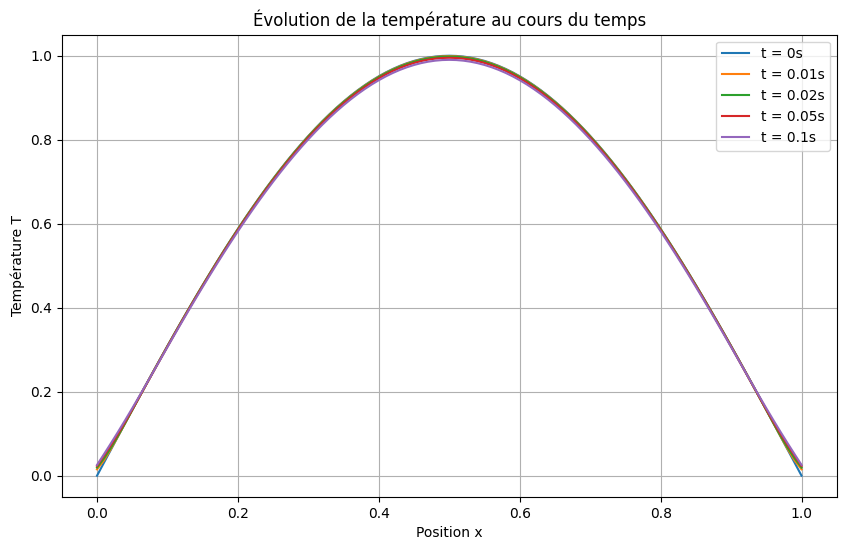

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes et paramètres
N = 100
delta_t = 0.0005
delta_x2 = 1/N
D = 1
T0 = 0
T1 = 0

if delta_t < (delta_x2 / 2 * D):

    M = np.zeros((N + 1, N + 1))

    # Remplissage de la matrice M
    for i in range(N + 1):
        if i == 0:
            M[i, i] = (1 - 2 * delta_t * D / delta_x2)
            M[i, i + 1] = delta_t * D / delta_x2
        elif i == N:
            M[i, i - 1] = delta_t * D / delta_x2
            M[i, i] = (1 - 2 * delta_t * D / delta_x2)
        else:
            M[i, i - 1] = delta_t * D / delta_x2
            M[i, i] = (1 - 2 * delta_t * D / delta_x2)
            M[i, i + 1] = delta_t * D / delta_x2

    # Affichage de la matrice M
    print(f"Matrice M: {M}")

    # Vecteur spatial pour tracer
    x = np.linspace(0, 1, N+1)

    # Condition initiale T₀(x) = sin(πx)
    T = np.sin(np.pi * x)
    T[0] = T0
    T[N] = T1

    # Temps de simulation
    temps_final = 0.1
    nb_iterations = int(temps_final / delta_t)

    # Sauvegarder quelques profils à différents temps
    profils = [T.copy()]
    temps_sauvegarde = [0, 0.01, 0.02, 0.05, 0.1]
    indices_sauvegarde = [int(t/delta_t) for t in temps_sauvegarde[1:]]

    # Simulation de l'évolution temporelle
    for n in range(nb_iterations):
        T = M @ T
        if n+1 in indices_sauvegarde:
            profils.append(T.copy())

    # Tracer les profils de température
    plt.figure(figsize=(10, 6))
    for i, t in enumerate(temps_sauvegarde):
        if i < len(profils):
            plt.plot(x, profils[i], label=f't = {t}s')

    plt.xlabel('Position x')
    plt.ylabel('Température T')
    plt.title('Évolution de la température au cours du temps')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Constante incorrect")
    print(f"delta_t = {delta_t}")
    print(f"(delta_x2 / 2 * D) = {(delta_x2 / 2 * D)}")

